PCA is designed to plot large datasets without using multiple dimensions(we reduce dimensions, clear noisy data)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data preprocessing(data was taken from Kaggle; brain tumor type assiosiated with 54k genes)

In [2]:
brain = pd.read_csv('data/brain.csv')

In [3]:
brain.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [6]:
brain['type'].unique()

array(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal',
       'pilocytic_astrocytoma'], dtype=object)

In [15]:
brain_shorten = brain.drop('samples', axis=1).iloc[:, :30]
brain_shorten

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at
0,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,6.822846,8.222273,5.965720,6.070791,6.522746,7.031419,6.514768,8.333490,6.699891,8.290555
1,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,5.855870,6.914568,6.856960,7.268411,7.805840,7.953560,7.049230,7.985905,8.285225,9.759504
2,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,6.115325,6.706525,7.236168,7.062774,7.702766,7.713712,7.146639,8.958272,5.966615,8.235646
3,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,5.835465,8.985858,6.688773,6.582501,7.073578,7.603237,6.420513,9.477679,5.921865,7.775342
4,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,5.603343,8.221752,5.950401,5.752766,7.916434,8.139826,6.739943,9.620339,6.869073,8.265623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,6.092506,4.996330,6.648274,6.167474,7.350546,7.826477,6.518363,9.653409,6.987723,8.199827
126,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,5.763458,5.379189,7.140106,6.773599,8.527913,8.150819,6.870945,9.880342,6.748734,8.450770
127,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,5.794077,4.627095,6.598436,6.486709,7.797212,8.870719,6.302038,9.499624,6.871915,8.403972
128,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,5.406210,4.917388,6.388659,6.244366,8.126196,8.580536,6.622244,9.190213,7.262452,8.361061


In [28]:
brain_shorten[brain_shorten.isnull()]

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Feature Scaling/Analysis

In [18]:
brain_shorten.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452,6.068968,5.548389,...,6.013895,6.199752,6.858032,6.774547,7.548631,7.763072,6.665732,9.273505,6.771551,8.375123
std,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847,0.904152,0.627754,...,0.469087,1.511475,0.312170,0.412548,0.734968,0.729023,0.368126,0.602107,0.635576,0.459991
min,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079,4.491771,4.572279,...,5.208135,4.364027,5.950401,5.752766,5.148110,6.142005,5.858176,7.105594,5.729683,7.333573
25%,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051,5.462356,5.168066,...,5.678025,5.040228,6.685787,6.505639,7.045656,7.251345,6.378747,8.895297,6.399374,8.094568
50%,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447,5.856087,5.331755,...,5.942015,5.442389,6.844887,6.783845,7.592689,7.779092,6.631749,9.310365,6.684046,8.314027
75%,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782,6.476124,5.740363,...,6.280546,7.470297,7.055198,7.012322,8.020161,8.163412,6.971371,9.658401,6.933189,8.559713
max,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959,8.646862,7.607336,...,7.981707,10.120006,8.123301,8.610753,9.601221,9.982974,7.393929,10.748360,9.711893,9.759504


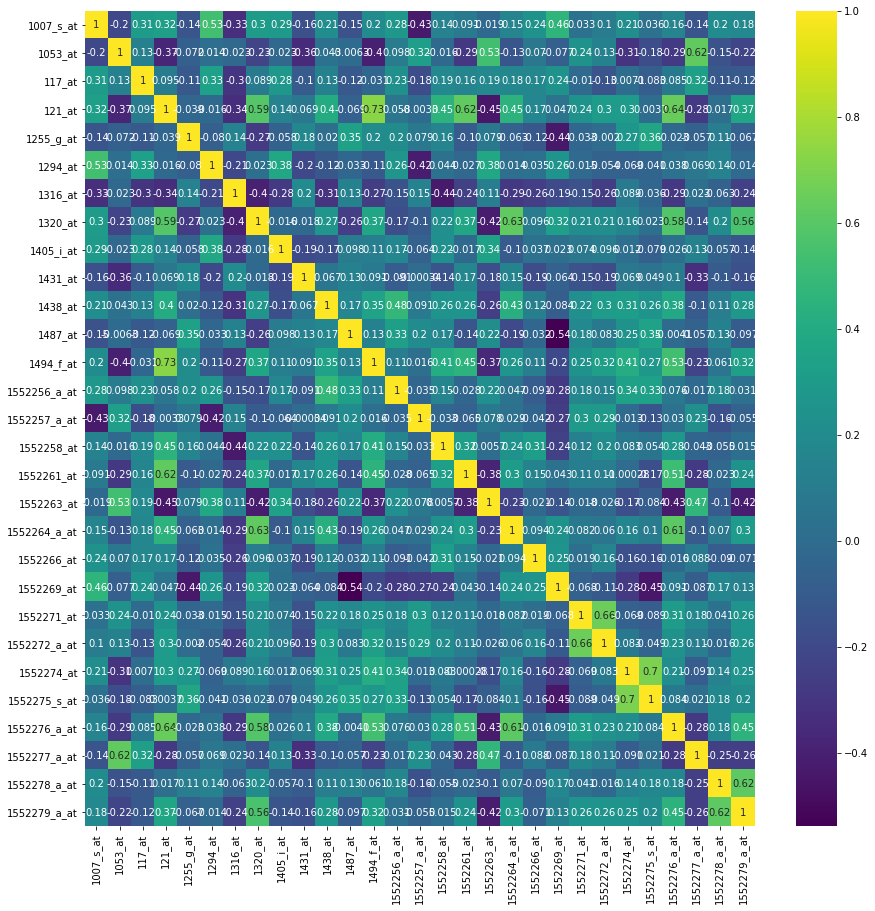

In [17]:
correlation = brain_shorten.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap='viridis')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(brain_shorten.drop('type', axis=1))
X

array([[ 0.28173373, -1.73630444, -0.8145423 , ..., -1.56725047,
        -0.11318507, -0.18456024],
       [ 1.00498979, -1.1501069 , -0.49698782, ..., -2.1467659 ,
         2.39079377,  3.02122636],
       [ 1.00593412, -0.29205229,  0.89520246, ..., -0.52557577,
        -1.27136763, -0.30439071],
       ...,
       [ 0.54705896,  0.03896483,  0.04812085, ...,  0.3769989 ,
         0.15852169,  0.06295723],
       [ 0.51860218, -0.70907044, -0.47849434, ..., -0.13887067,
         0.77535992, -0.03068892],
       [ 0.15414353,  0.11022798,  1.06689351, ...,  0.21801614,
        -1.1773344 , -0.82430205]])

Find out covariant array

In [39]:
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
#cov_mat = np.cov(X)
print(cov_mat)

[[ 1.00775194e+00 -2.03387890e-01  3.11522758e-01  3.24698317e-01
  -1.40455692e-01  5.37939881e-01 -3.30560777e-01  3.06235376e-01
   2.97079299e-01 -1.66128408e-01  2.10489891e-01 -1.50626232e-01
   2.00299687e-01  2.78262145e-01 -4.35435692e-01  1.45227205e-01
   9.21265779e-02 -1.90282774e-02  1.55408931e-01  2.39516697e-01
   4.65776613e-01  3.33153477e-02  1.02932659e-01  2.14688859e-01
   3.61747591e-02  1.58712416e-01 -1.39967598e-01  1.97937221e-01
   1.85529395e-01]
 [-2.03387890e-01  1.00775194e+00  1.28317239e-01 -3.76302330e-01
  -7.29585221e-02  1.39990848e-02 -2.30325452e-02 -2.30873830e-01
  -2.31931770e-02 -3.57892523e-01  4.36662160e-02 -6.39176489e-03
  -4.03008729e-01  9.87341145e-02  3.21768473e-01 -1.57681029e-02
  -2.89022884e-01  5.35910151e-01 -1.28898400e-01  7.02987840e-02
  -7.78632592e-02  2.45087876e-01  1.31206283e-01 -3.11051880e-01
  -1.79190692e-01 -2.87364182e-01  6.26789317e-01 -1.50169839e-01
  -2.24942059e-01]
 [ 3.11522758e-01  1.28317239e-01  1.0

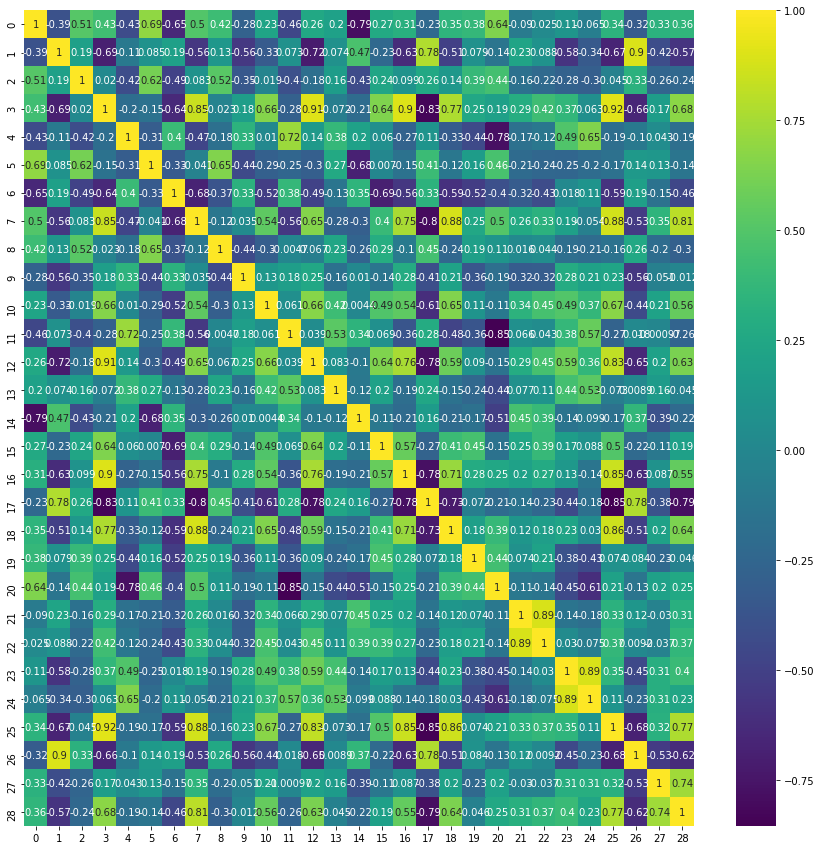

In [40]:
correlation_scaled = pd.DataFrame(cov_mat).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_scaled, annot=True, cmap='viridis')

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 1.03184473e+00, -2.36534795e+00, -3.80821275e+00, ...,
        -4.50356840e-01,  4.92996912e-01,  3.28194067e-02],
       [ 4.53461023e+00,  1.49503602e-01, -2.62466283e+00, ...,
         3.92235566e-01,  2.00123353e-01,  4.30617427e-02],
       [ 2.70865713e+00, -1.13464029e+00,  9.47143940e-01, ...,
        -4.38252993e-02,  3.24672645e-01,  6.90538231e-04],
       ...,
       [-1.45293616e+00,  8.77351343e-01,  1.44595155e+00, ...,
        -1.79380808e-01,  4.18202387e-01, -1.25469179e-02],
       [-1.68804263e+00,  1.76551063e+00, -1.15854001e-01, ...,
        -1.18033156e-01,  9.83806139e-02, -1.82224018e-01],
       [-1.82913259e+00, -9.22133254e-01,  1.56068374e+00, ...,
        -2.22906309e-01,  1.99410274e-01, -6.52595304e-01]])

Finding useful amount of PCs to classify further(we can use Decision Trees)

In [44]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.19649627, 0.12004023, 0.1077445 , 0.08894895, 0.0662283 ,
       0.05108248, 0.04151777, 0.03968921, 0.03513507, 0.02902435,
       0.02554588, 0.02491774, 0.02207151, 0.02179719, 0.01615639,
       0.01489372, 0.01291175, 0.01202549, 0.0097864 , 0.0095819 ,
       0.0091425 , 0.00837482, 0.00750727, 0.0070652 , 0.00595793,
       0.00491658, 0.00440682, 0.00393858, 0.00309519])

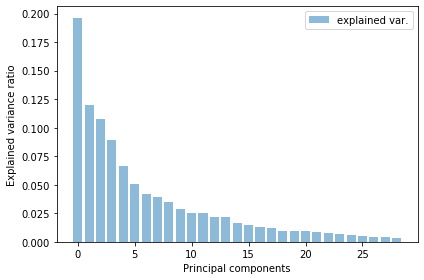

In [55]:
plt.figure(figsize=(6, 4))
plt.bar(range(29), explained_variance, alpha=0.5, align='center', label='explained var.')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Feasible PCs

In [54]:
explained_variance[:3]

array([0.19649627, 0.12004023, 0.1077445 ])